<a href="https://colab.research.google.com/github/ANKITA4545/Assignment-1-data-science-/blob/main/full_EDA_Carproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('/content/CarPrice_project (1).csv')
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
dataset.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [ ]:
len(dataset[dataset.duplicated()])

0

In [ ]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<Axes: xlabel='price', ylabel='Density'>

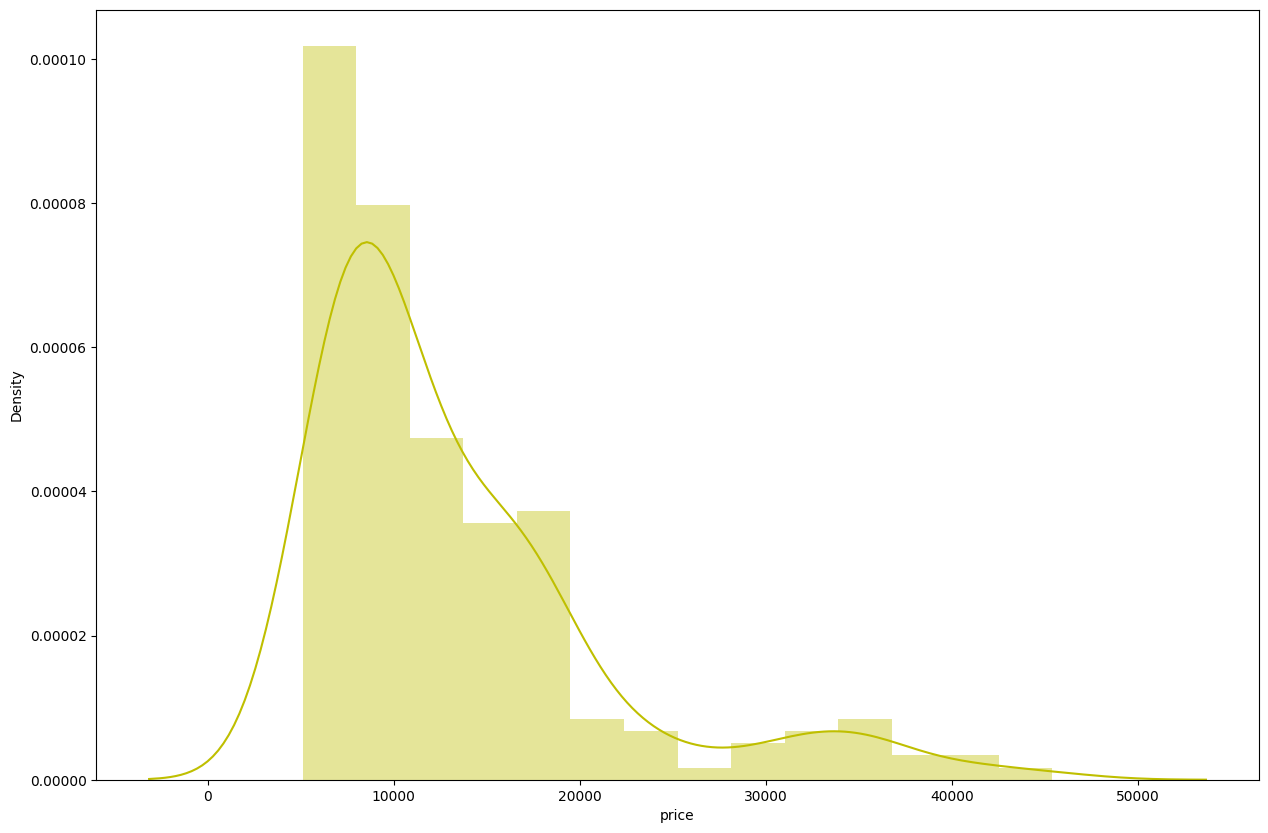

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset['price'],color="y")

<Axes: xlabel='price', ylabel='Density'>

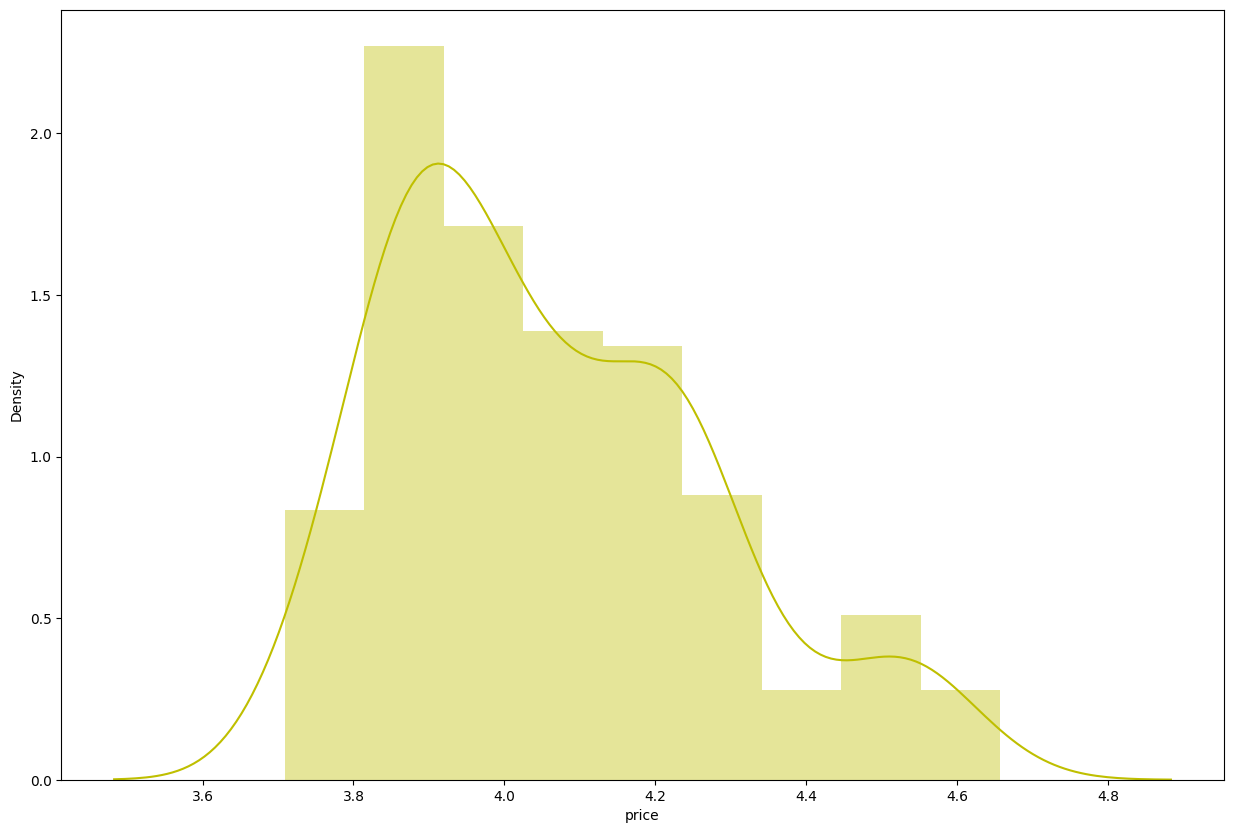

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(dataset['price']),color="y")

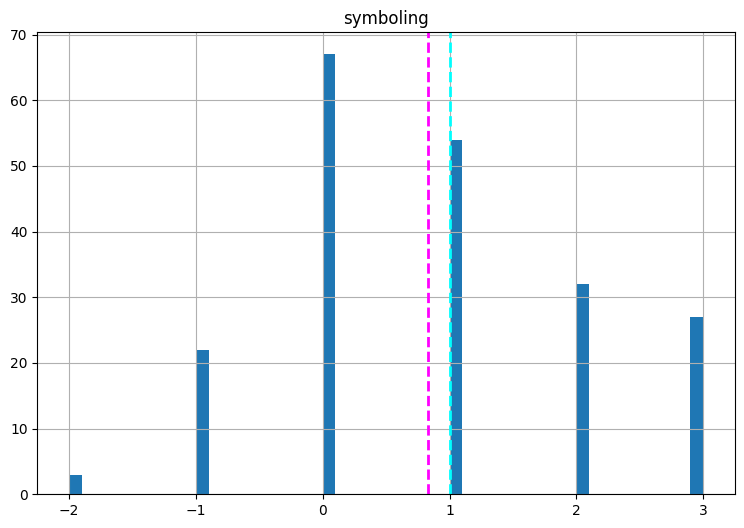

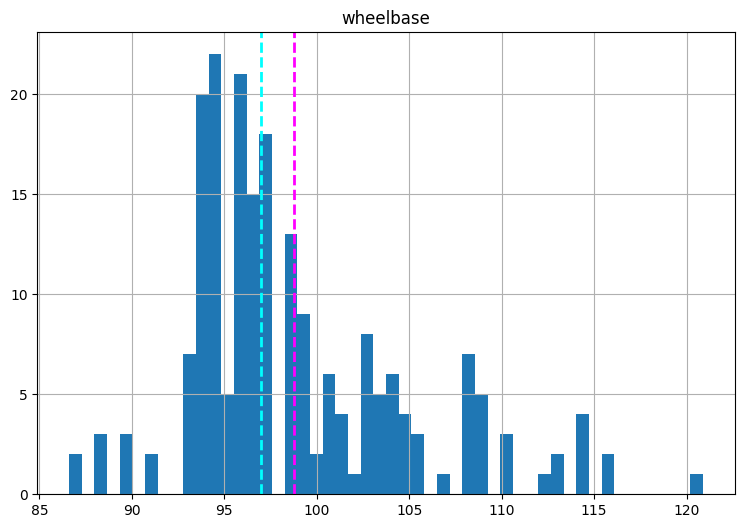

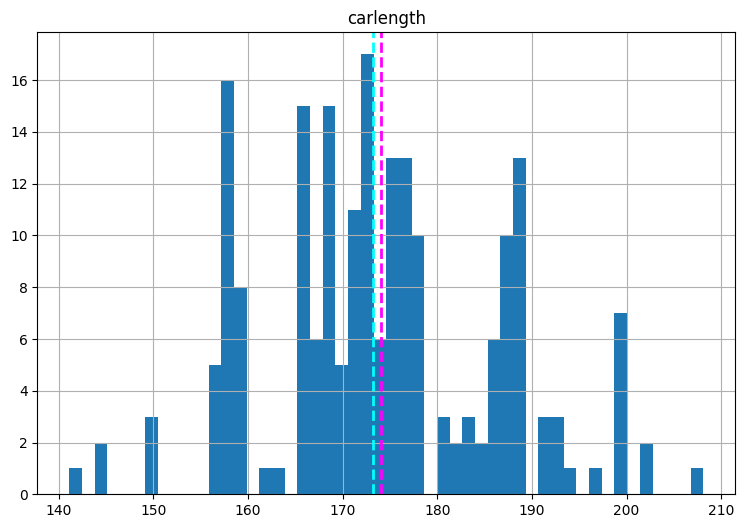

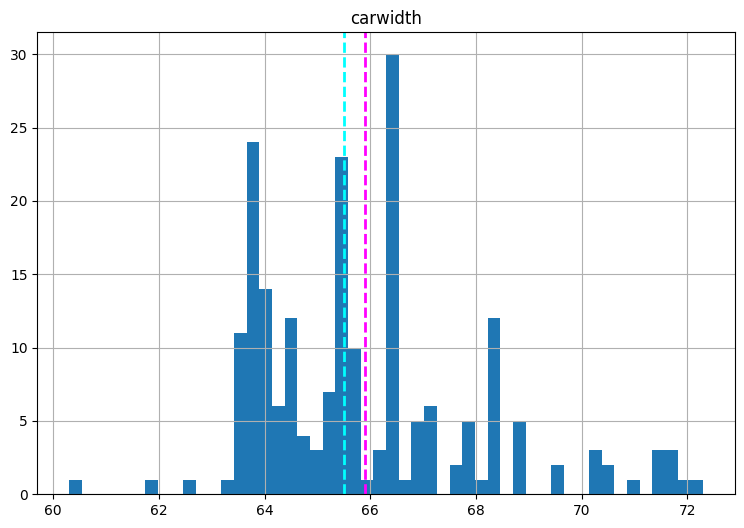

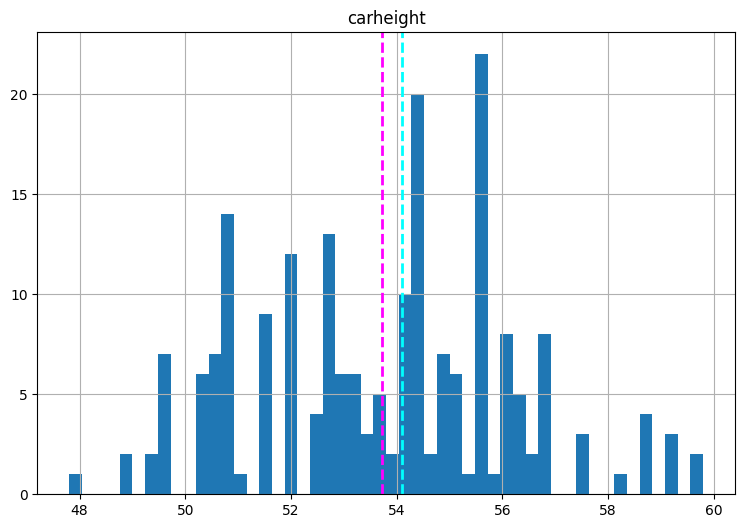

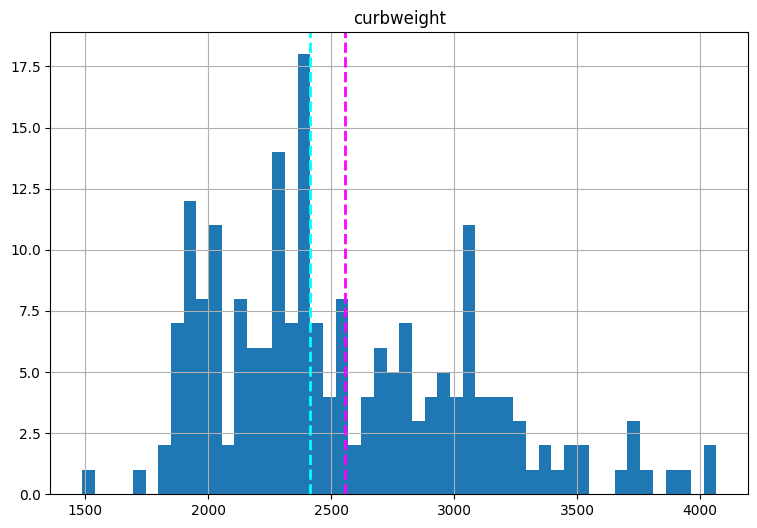

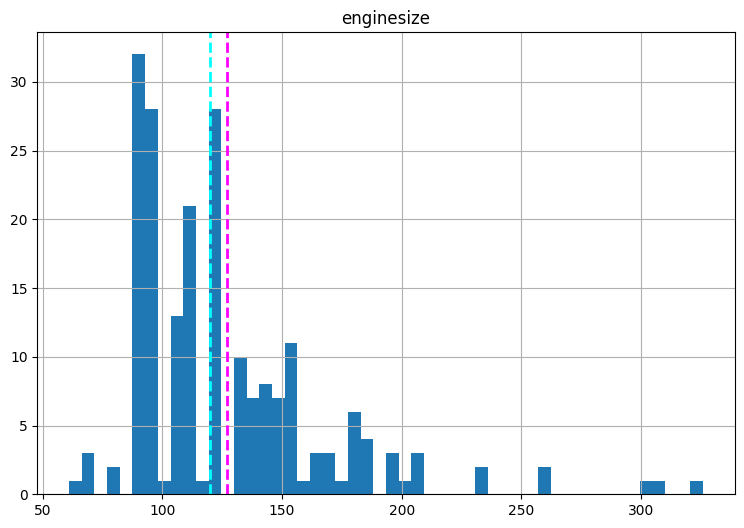

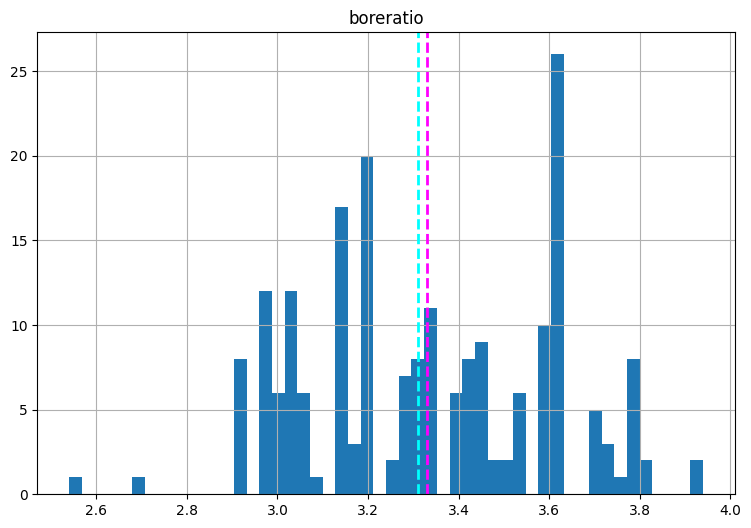

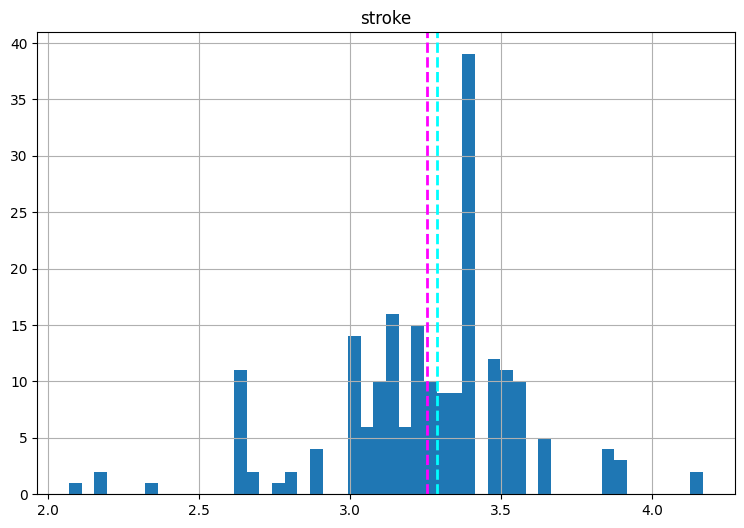

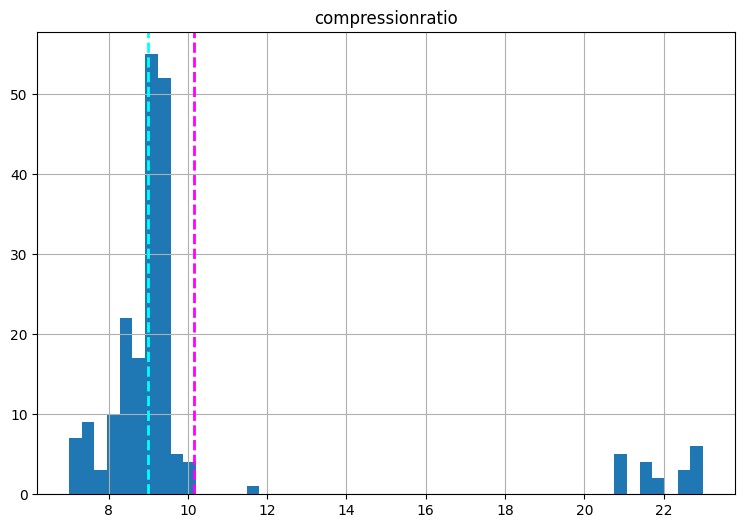

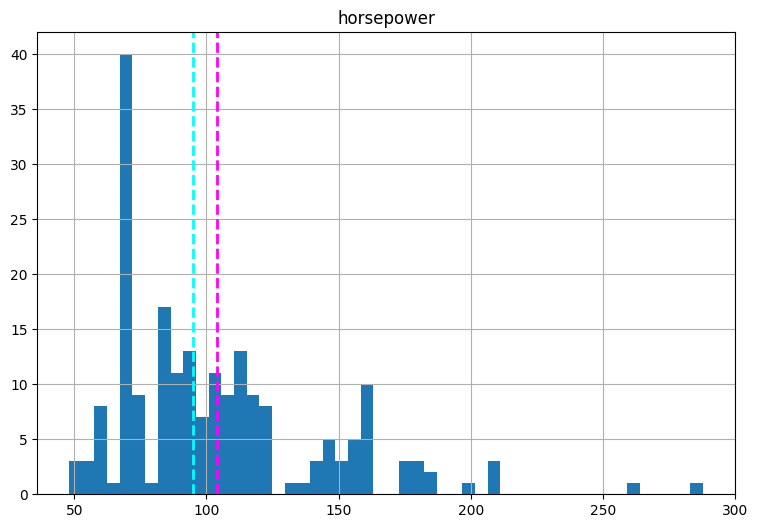

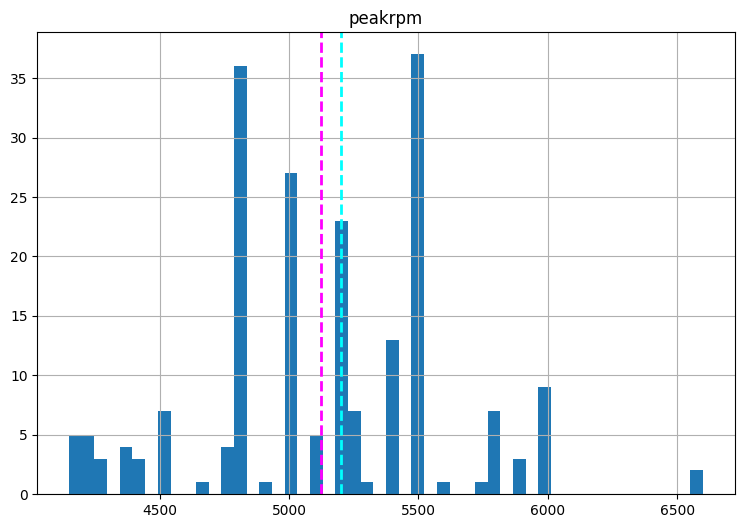

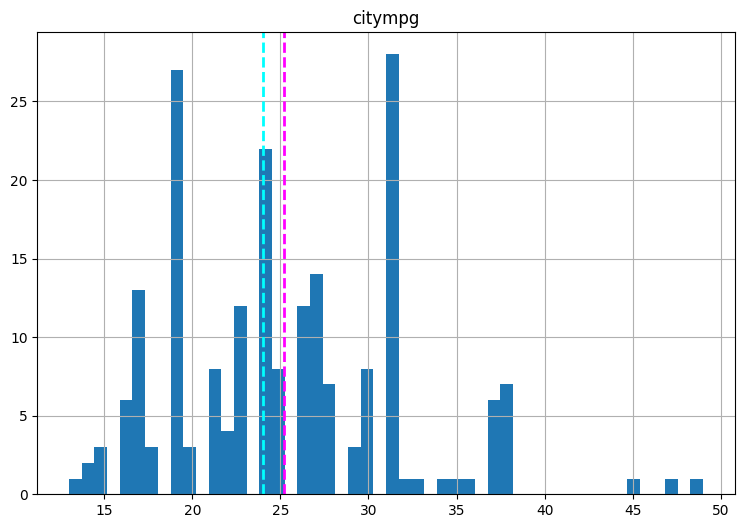

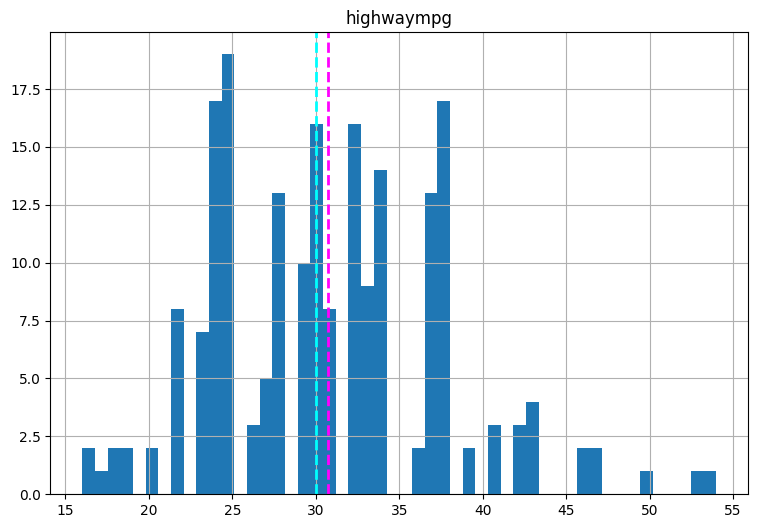

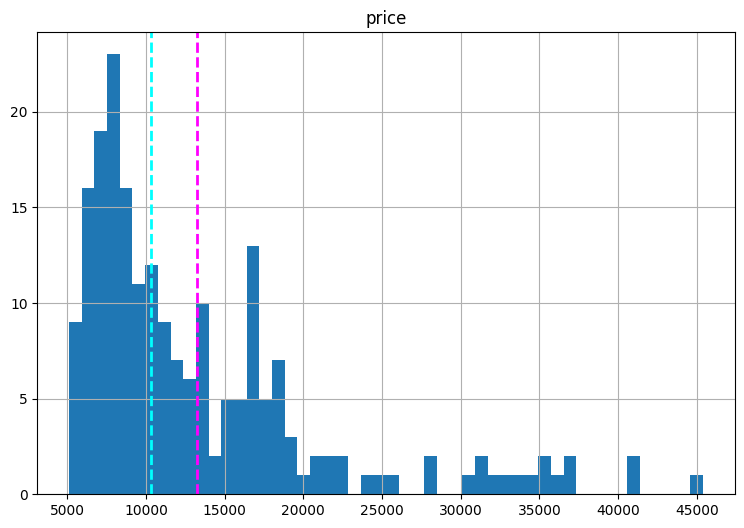

In [ ]:
numeric_features = dataset.describe().columns
for col in numeric_features[1:]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = dataset[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)

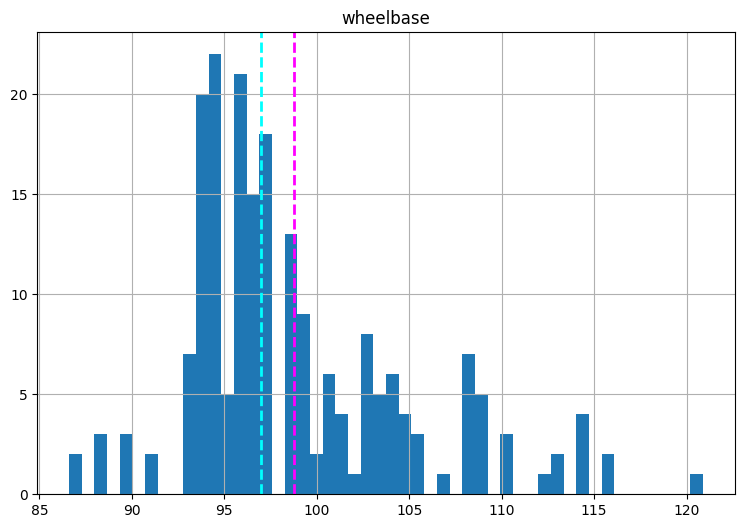

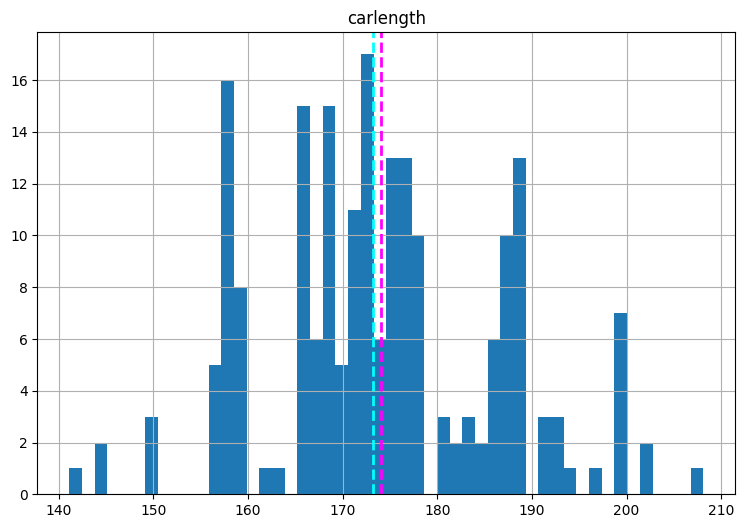

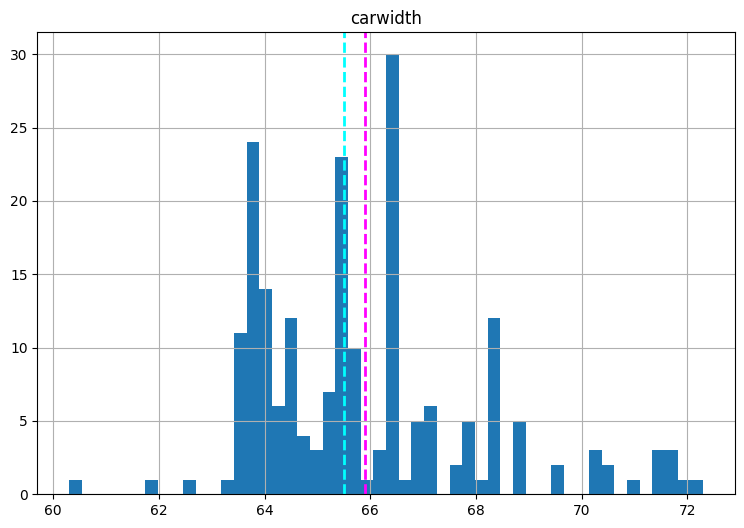

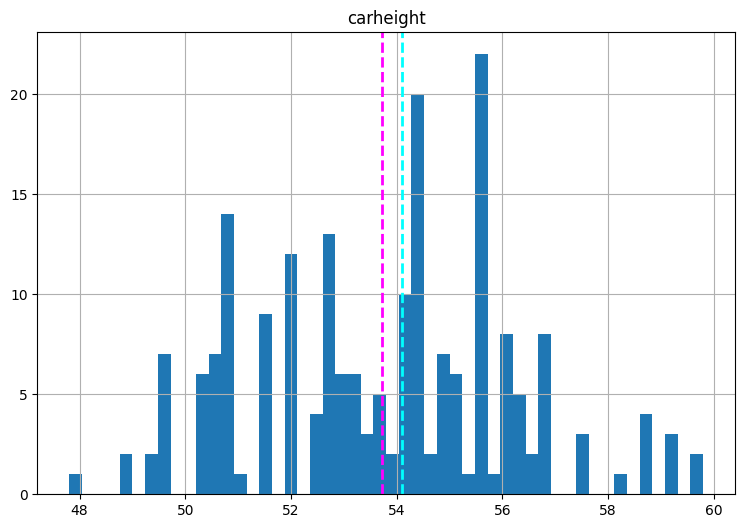

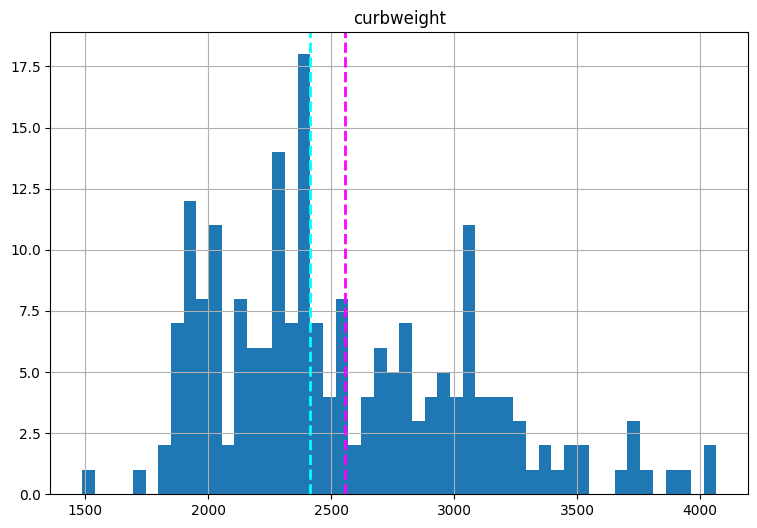

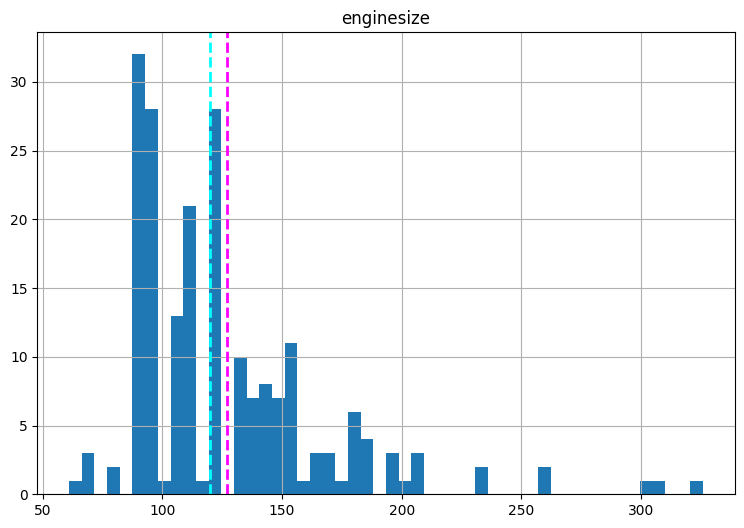

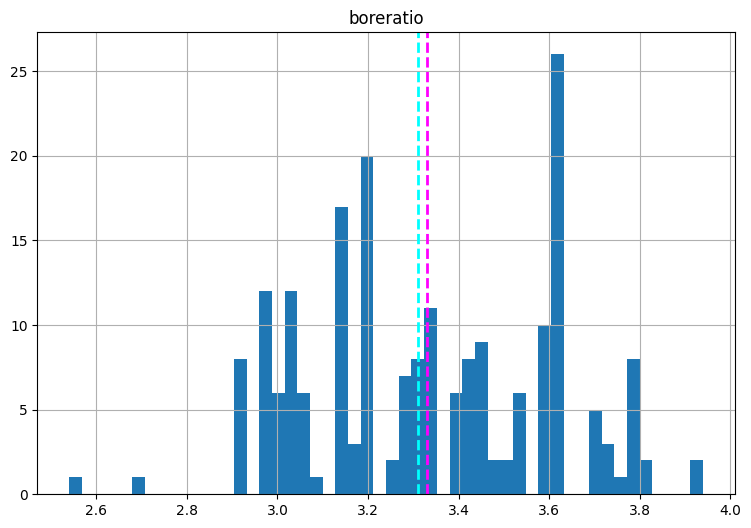

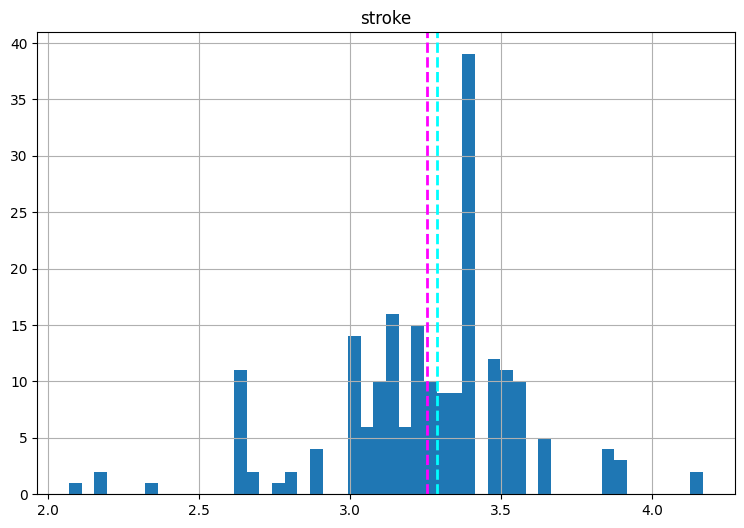

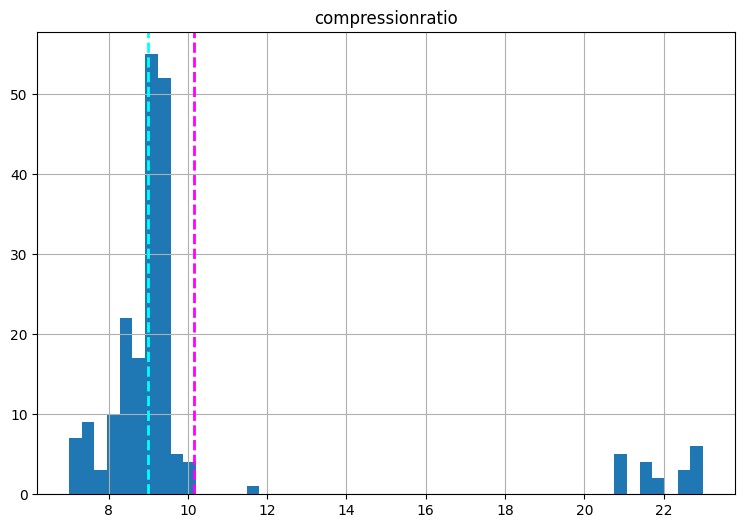

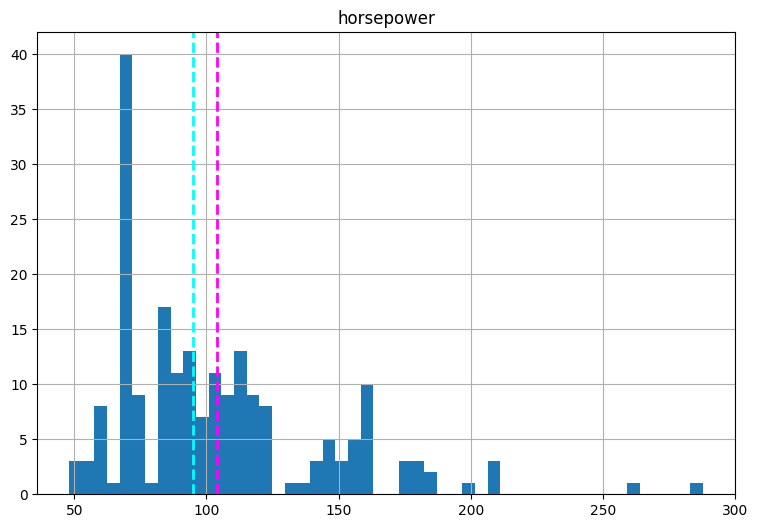

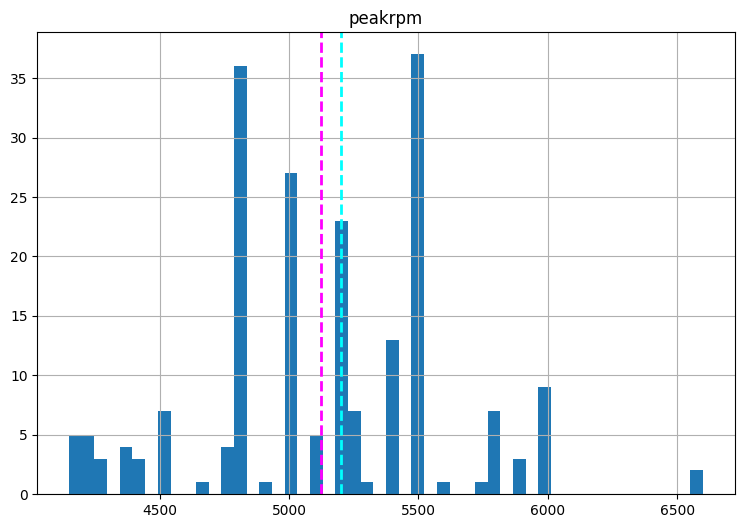

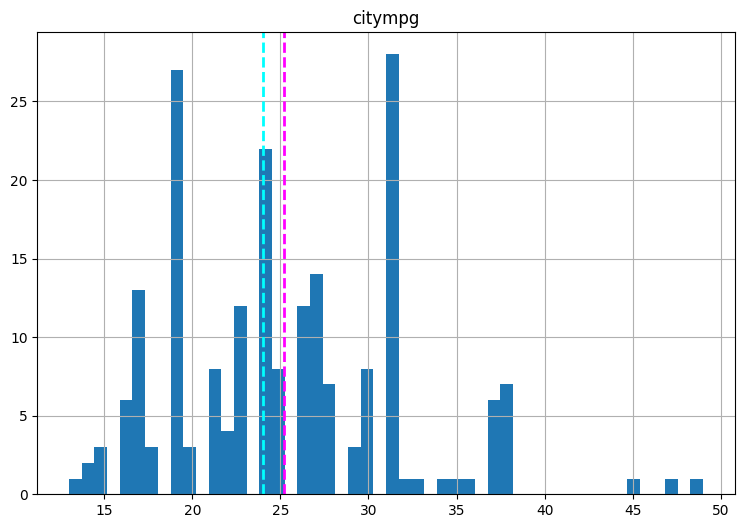

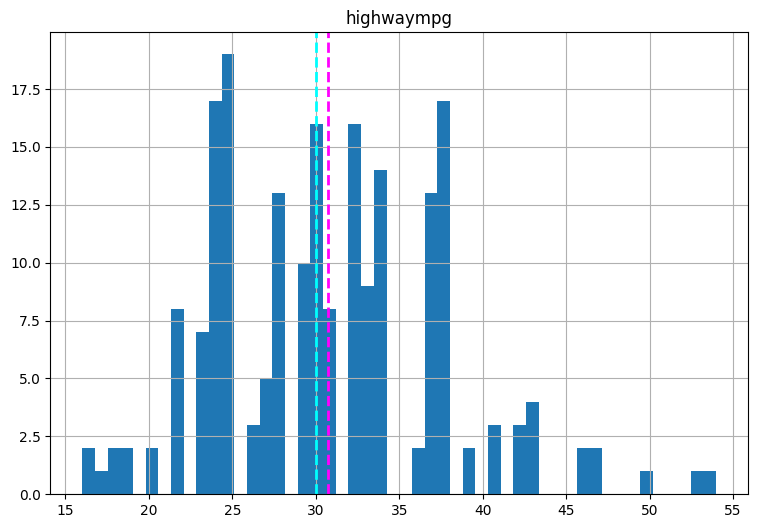

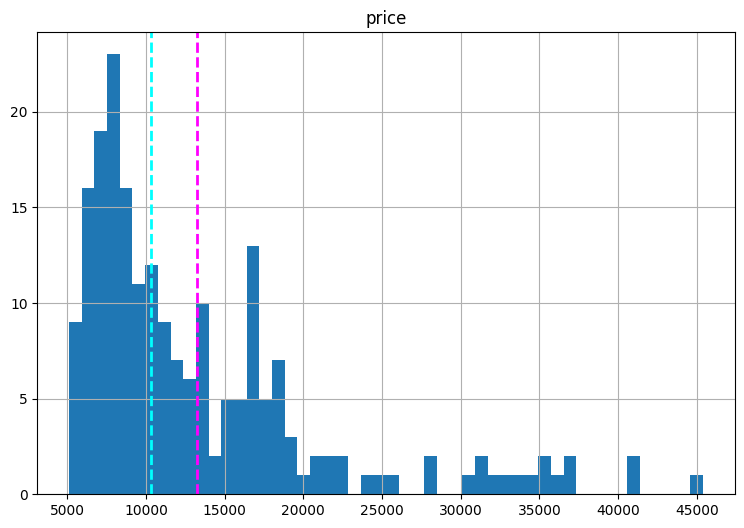

In [ ]:
for col in numeric_features[2:]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = dataset[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)

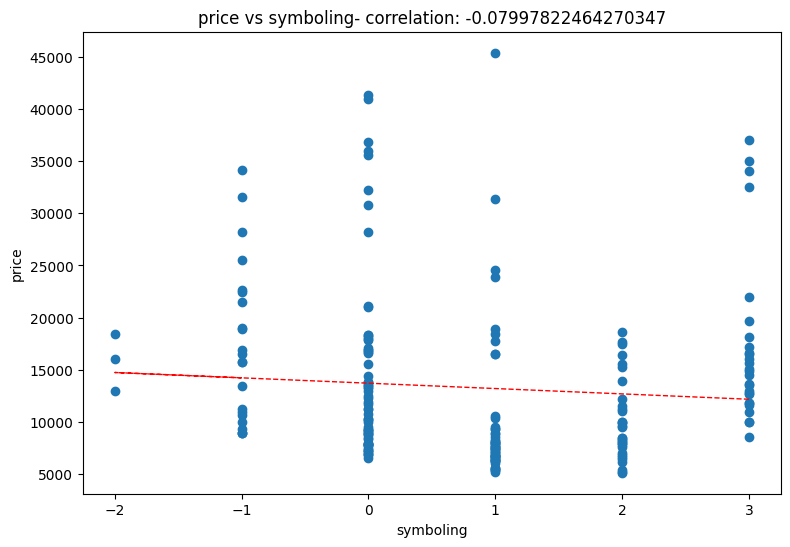

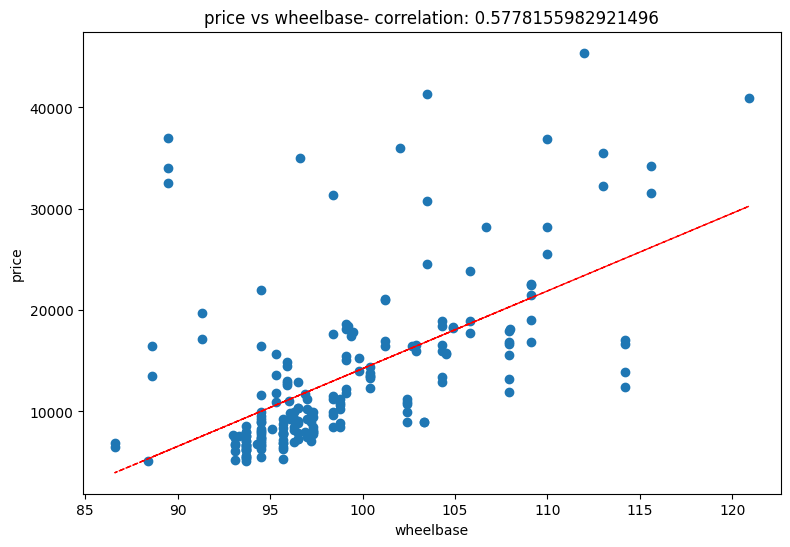

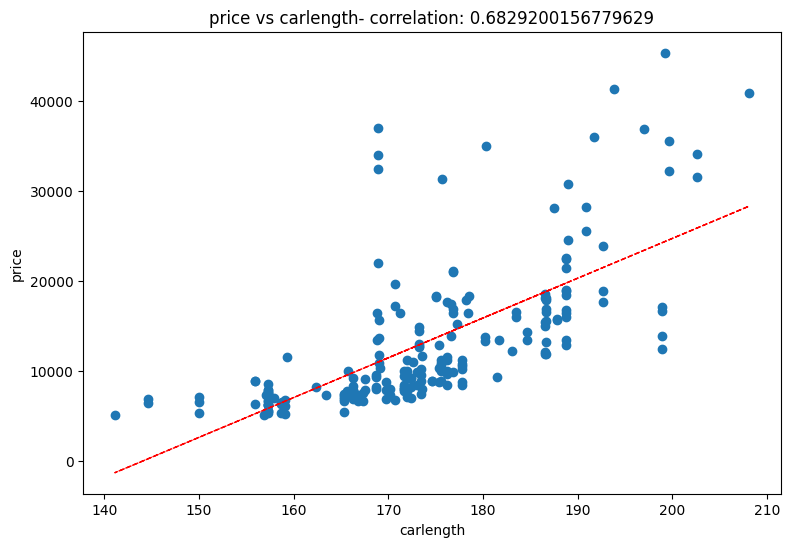

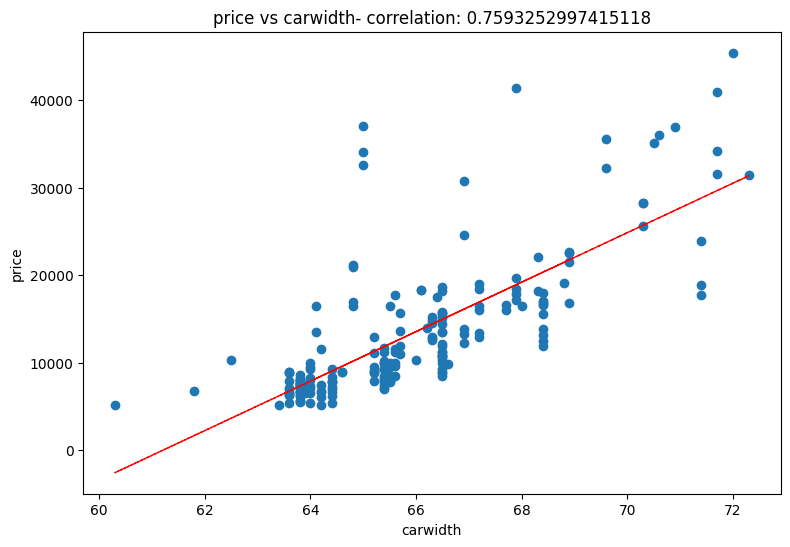

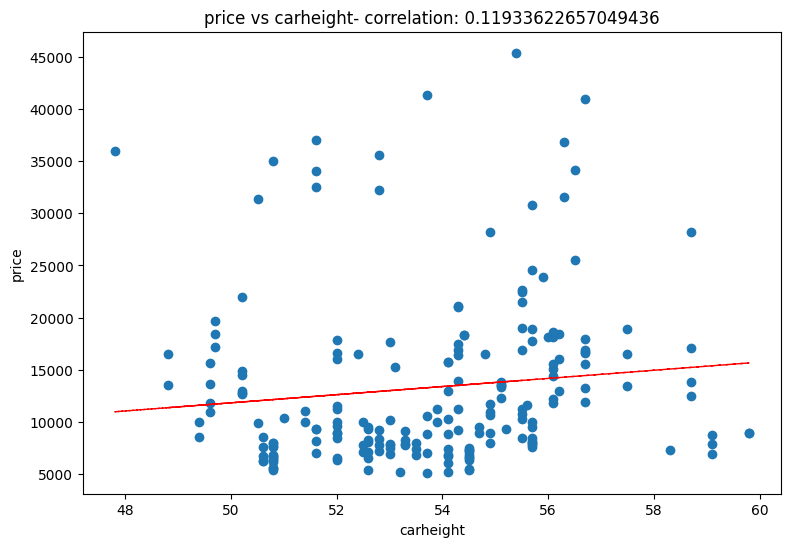

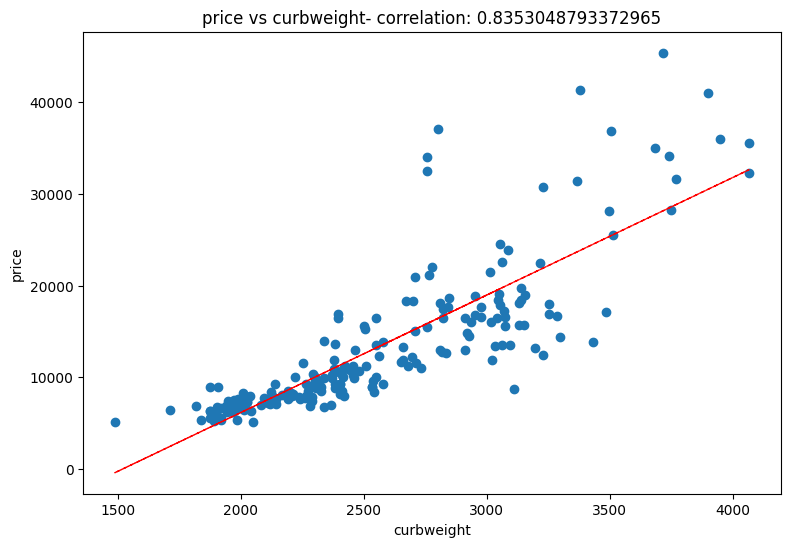

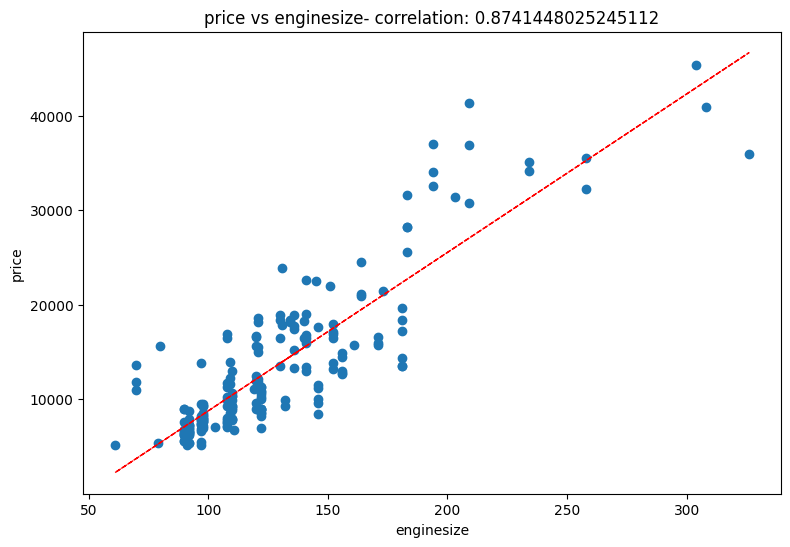

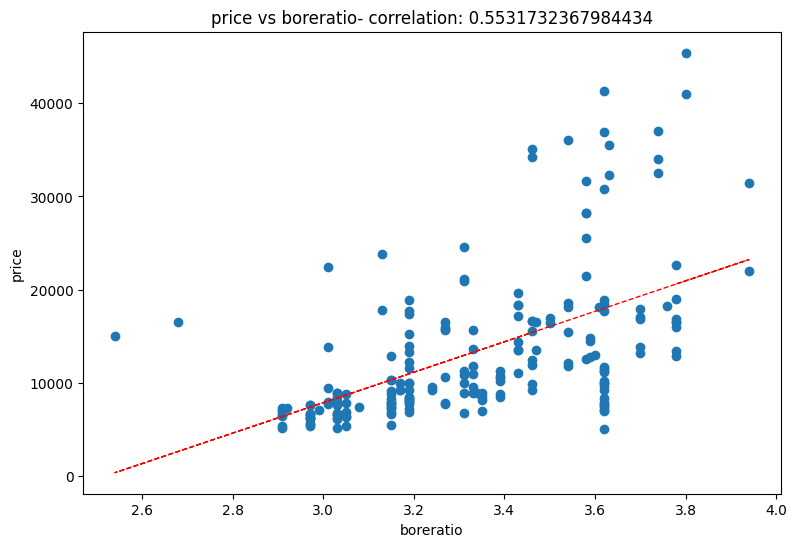

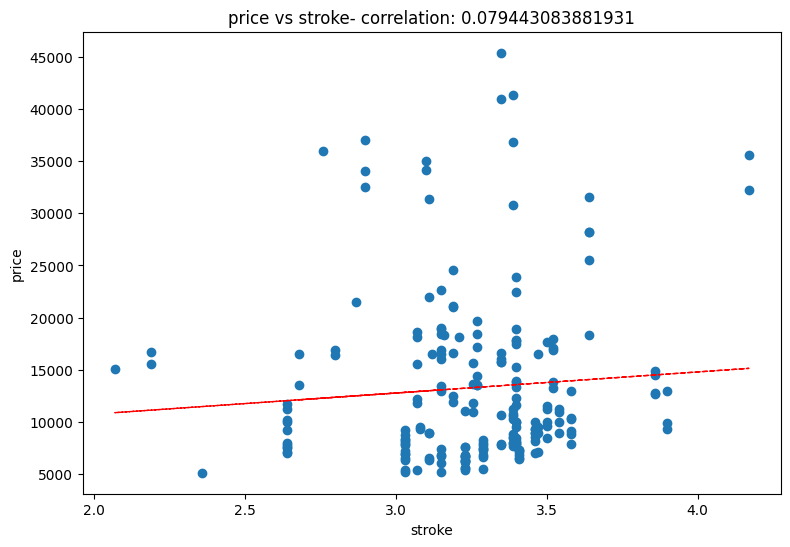

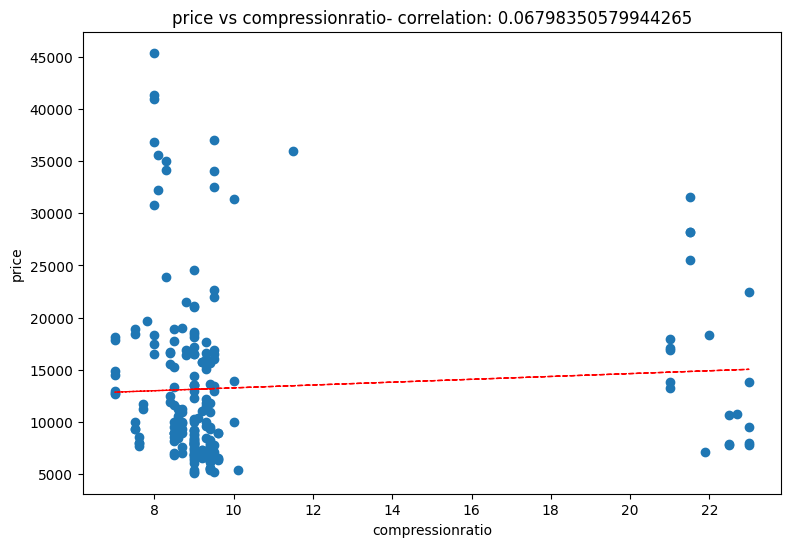

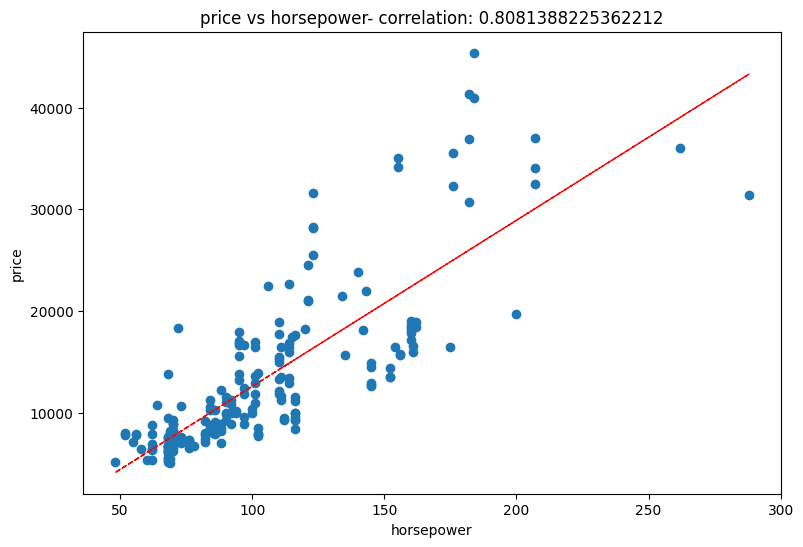

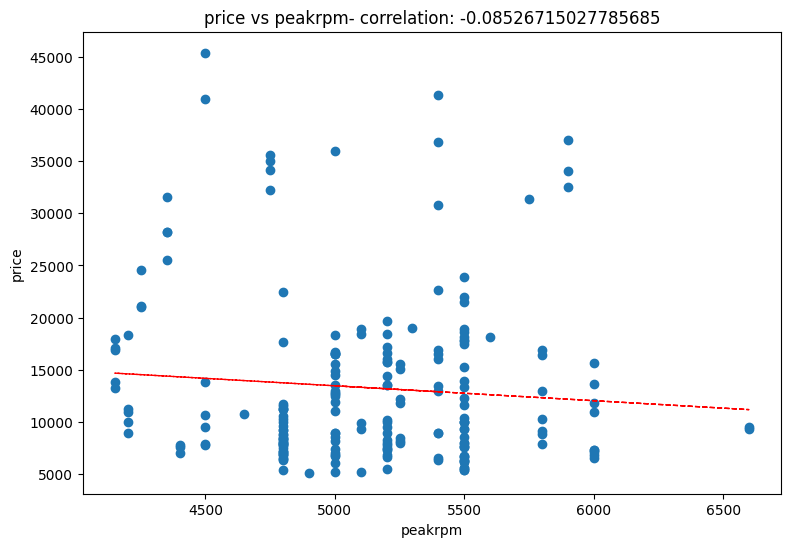

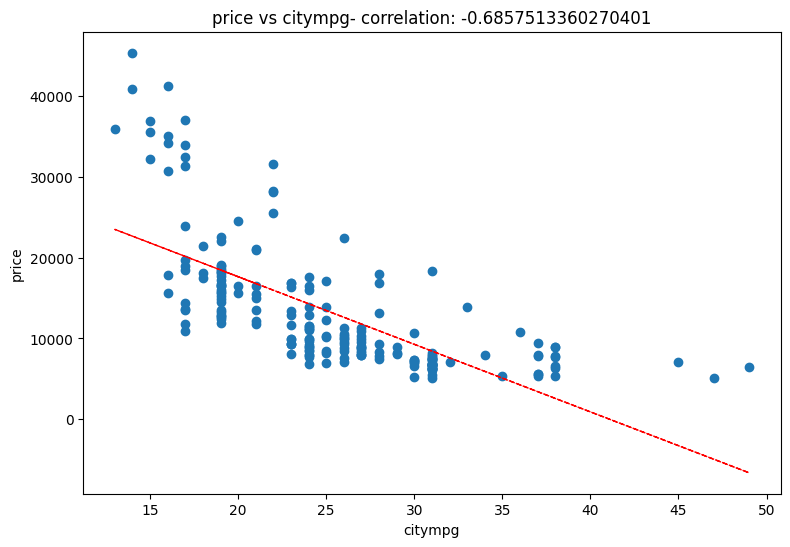

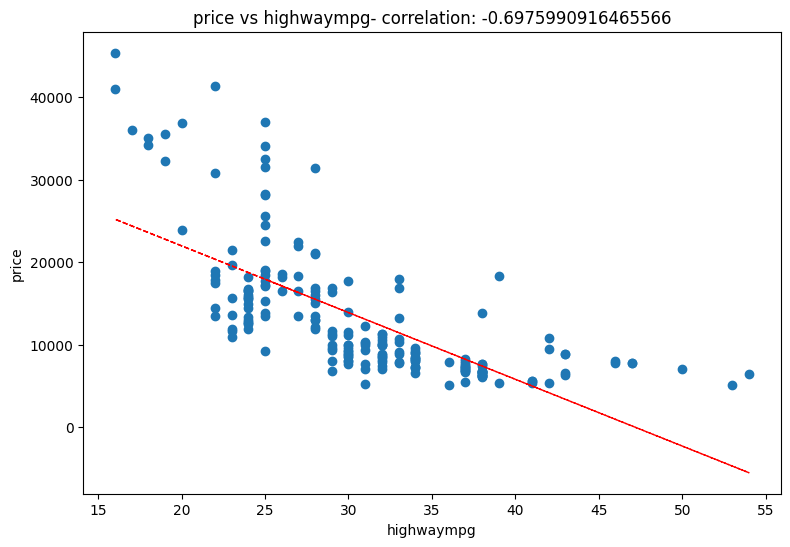

In [ ]:

    for col in numeric_features[1:-1]:
      fig = plt.figure(figsize=(9, 6))
      ax = fig.gca()
      feature = dataset[col]
      label = dataset['price']
      correlation = feature.corr(label)
      plt.scatter(x=feature, y=label)
      plt.xlabel(col)
      plt.ylabel('price')
      ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
      z = np.polyfit(dataset[col], dataset['price'], 1)
      y_hat = np.poly1d(z)(dataset[col])
      plt.plot(dataset[col], y_hat, "r--", lw=1)
      plt.show()

<Axes: >

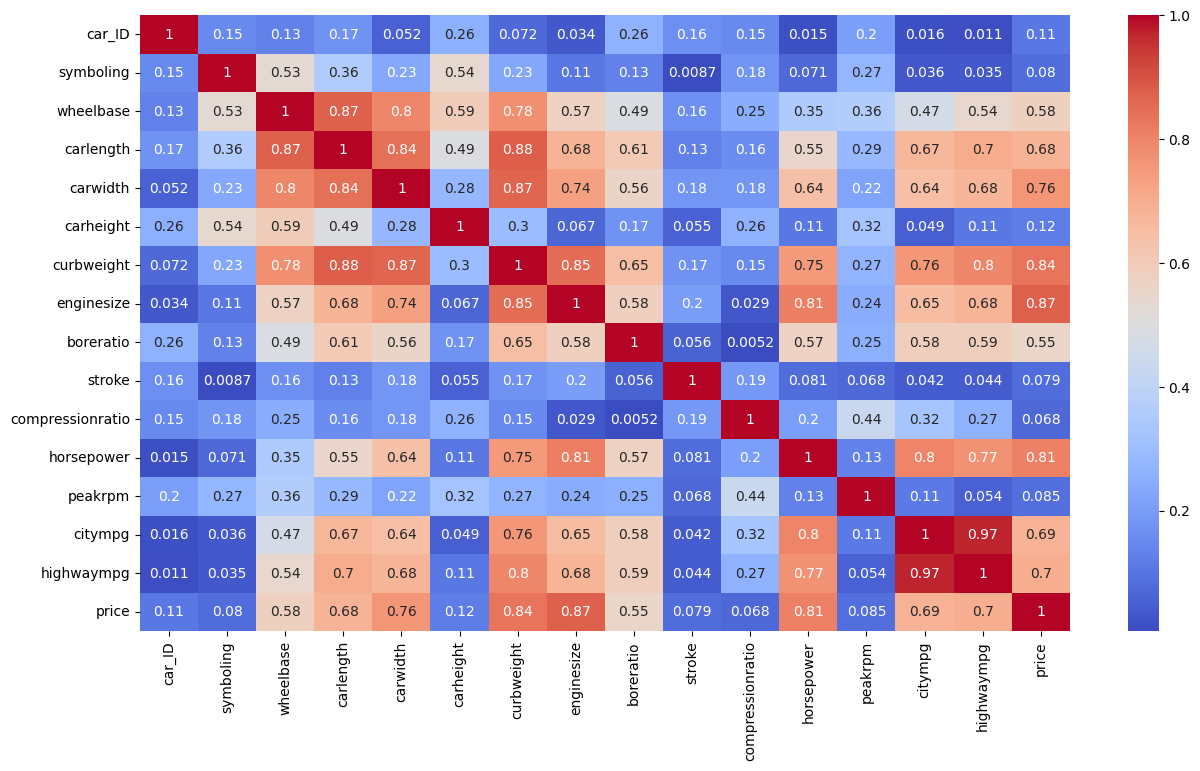

In [ ]:
plt.figure(figsize=(15,8))
# Only include numerical features for correlation calculation
numeric_features = dataset.select_dtypes(include=np.number).columns
correlation = dataset[numeric_features].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
dataset['mileage'] = 0.6*dataset['citympg'] + 0.4*dataset['highwaympg']
dataset['car_area'] = dataset['carlength']*dataset['carwidth']
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame() #Indented this line
    vif["variables"] = X.columns #Indented this line
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #Indented this line
    return(vif) #Indented this line
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_cat']]])

,variables,VIF
0,wheelbase,1944.515603
1,carlength,5803.828582
2,carwidth,2530.152128
3,carheight,1070.388198
4,curbweight,406.311717
5,enginesize,67.259991
6,boreratio,325.749207
7,stroke,130.428646
8,compressionratio,16.174965
9,horsepower,61.367972


In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price']]])

,variables,VIF
0,symboling,2.646796
1,wheelbase,2316.959780
2,carlength,6136.028870
3,carwidth,3170.397591
4,carheight,1108.503341
5,curbweight,415.172460
6,enginesize,68.941339
7,boreratio,326.471548
8,stroke,132.074737
9,compressionratio,16.465709


In [ ]:
numerical_features = ['enginesize','compressionratio','mileage']
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
dataset['company'] = dataset['CarName'].str.split(" ", expand=True)[0]
dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
'maxda':'Mazda','porcshce':'Porsche'})
dataset['company'] = dataset['company'].str.title()
dataset['company'].value_counts()

,count
company,
Toyota,32
Nissan,18
Mazda,17
Mitsubishi,13
Honda,13
Subaru,12
Volkswagen,12
Volvo,11
Peugeot,11


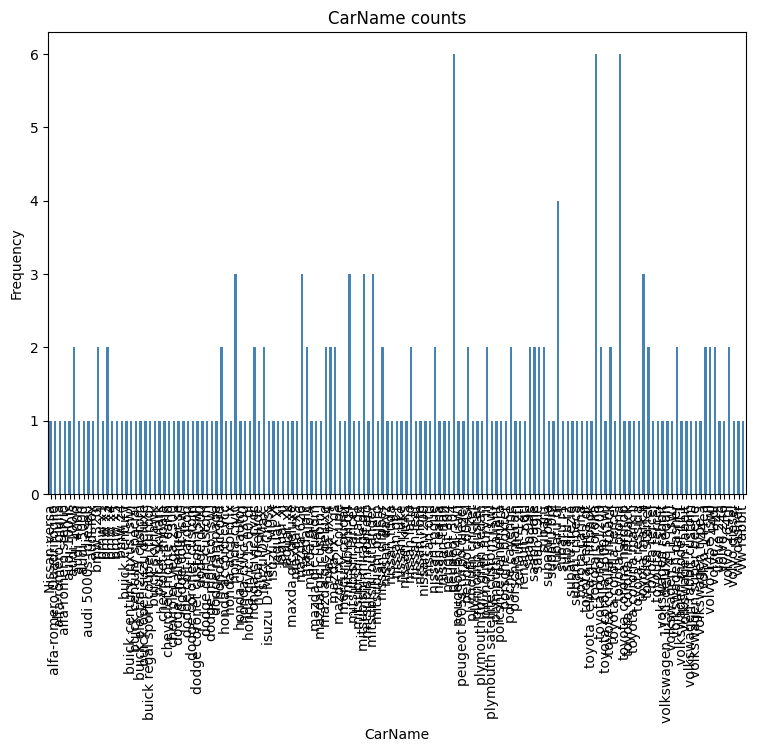

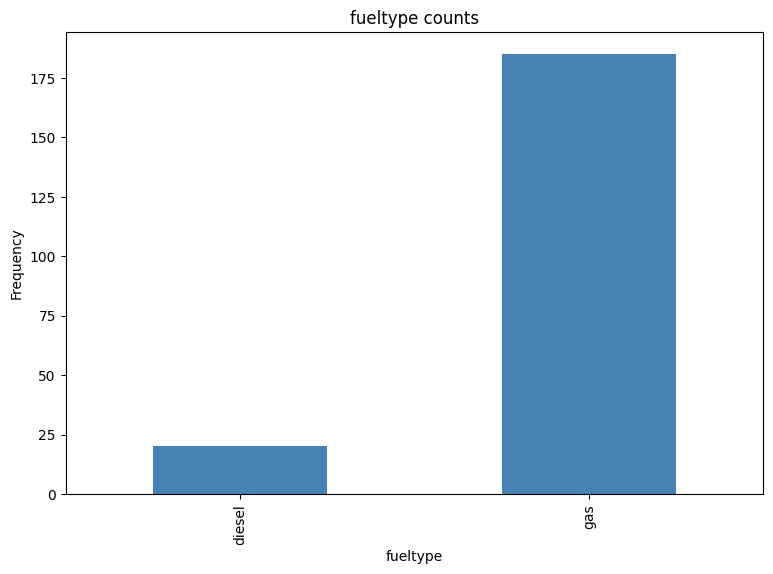

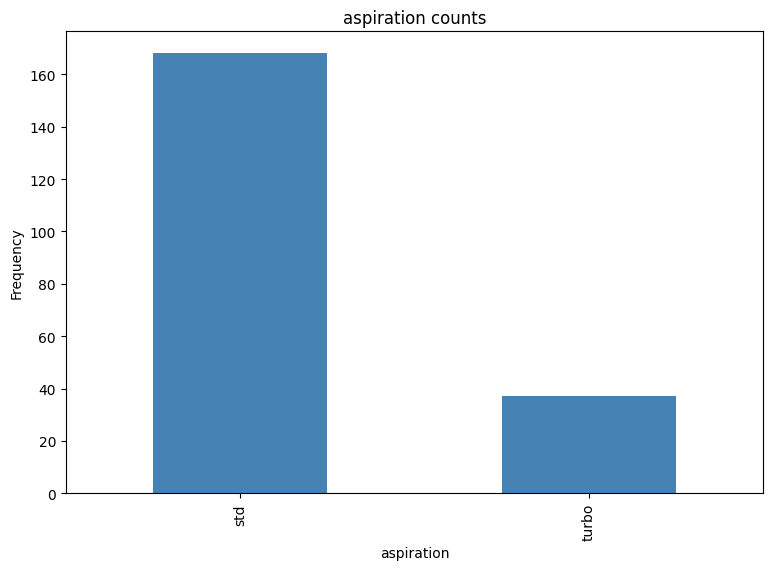

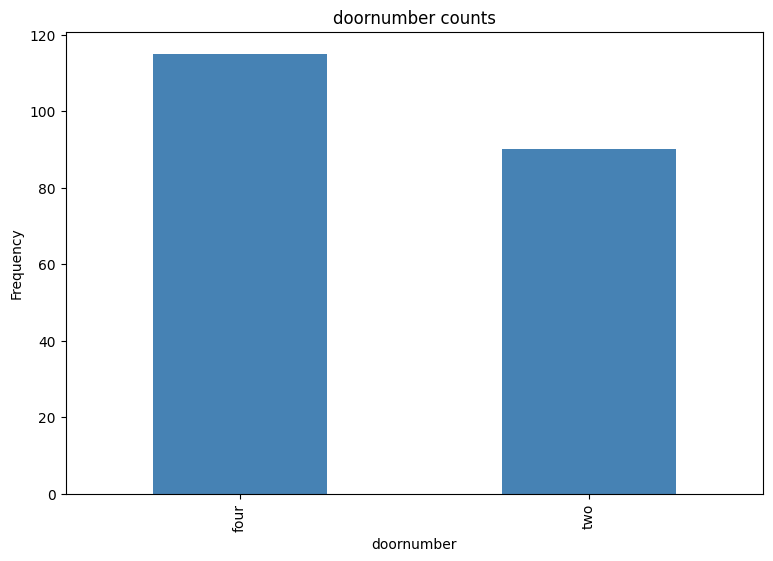

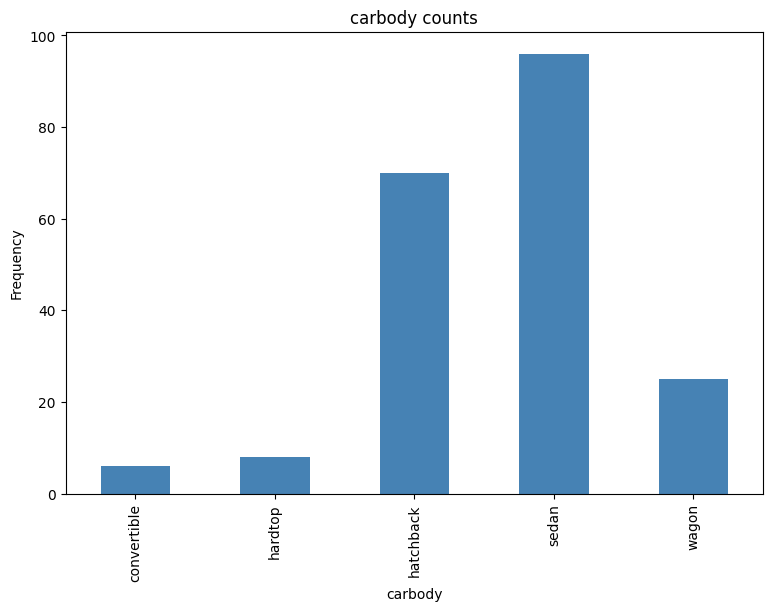

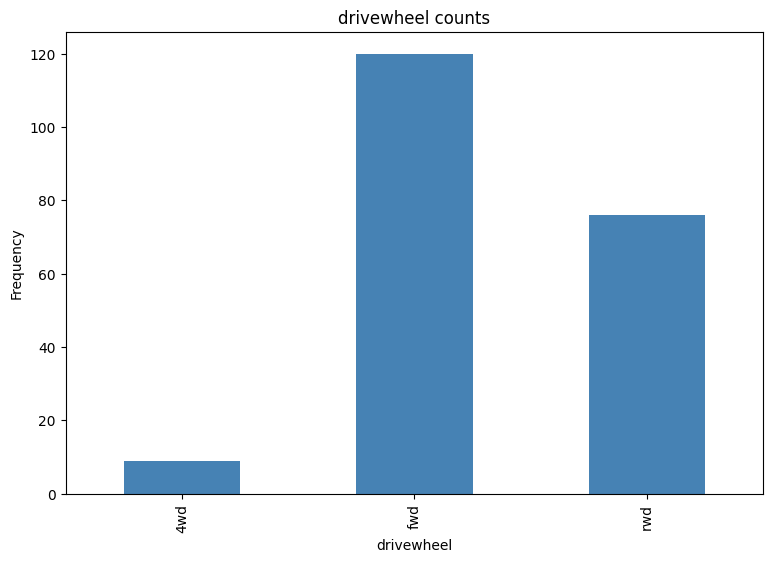

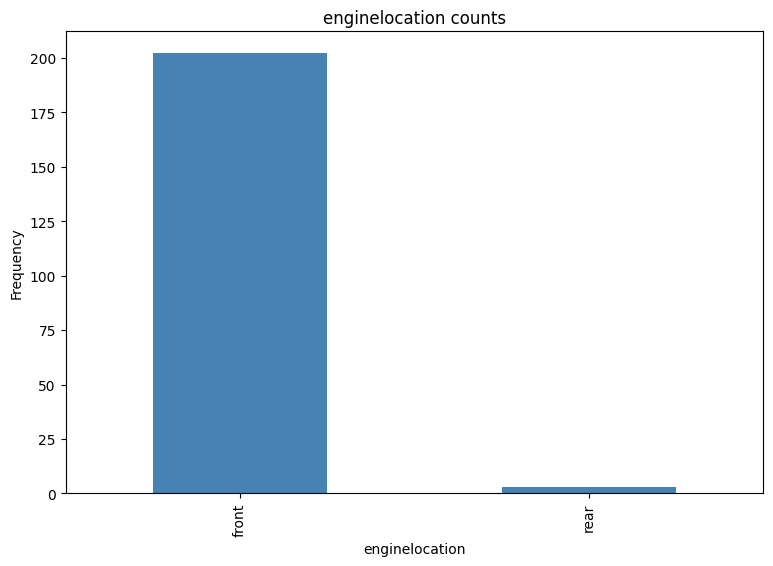

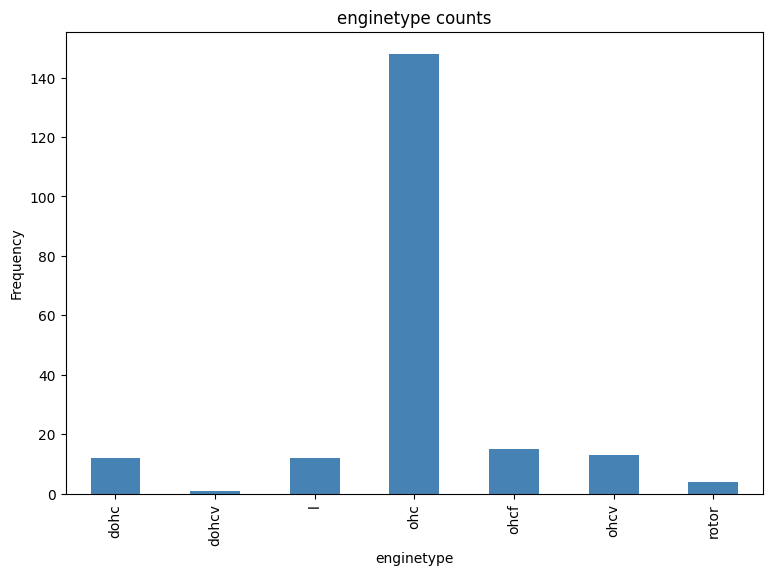

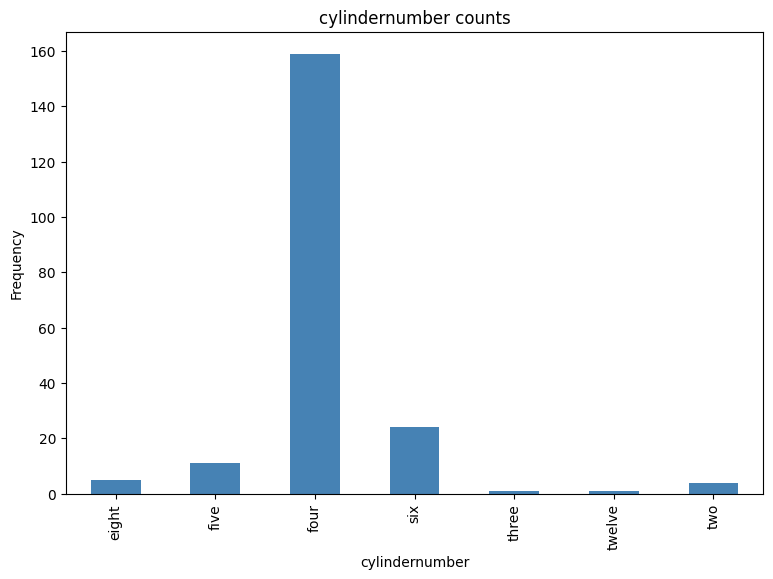

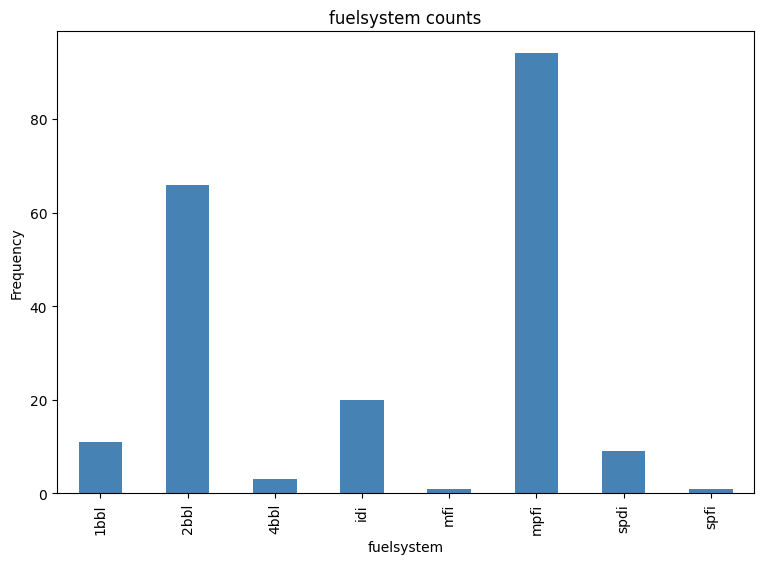

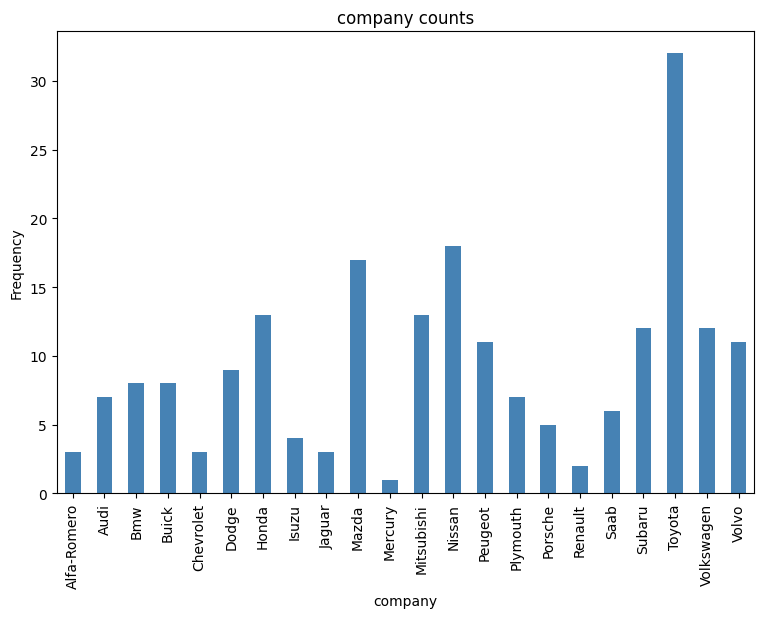

In [ ]:
categorical_features = dataset.describe(include=['object','category']).columns
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index() # Indented this line
    fig = plt.figure(figsize=(9, 6)) # Indented this line
    ax = fig.gca() # Indented this line
    counts.plot.bar(ax = ax, color='steelblue') # Indented this line
    ax.set_title(col + ' counts') # Indented this line
    ax.set_xlabel(col) # Indented this line
    ax.set_ylabel("Frequency") # Indented this line
    plt.show() # Indented this line

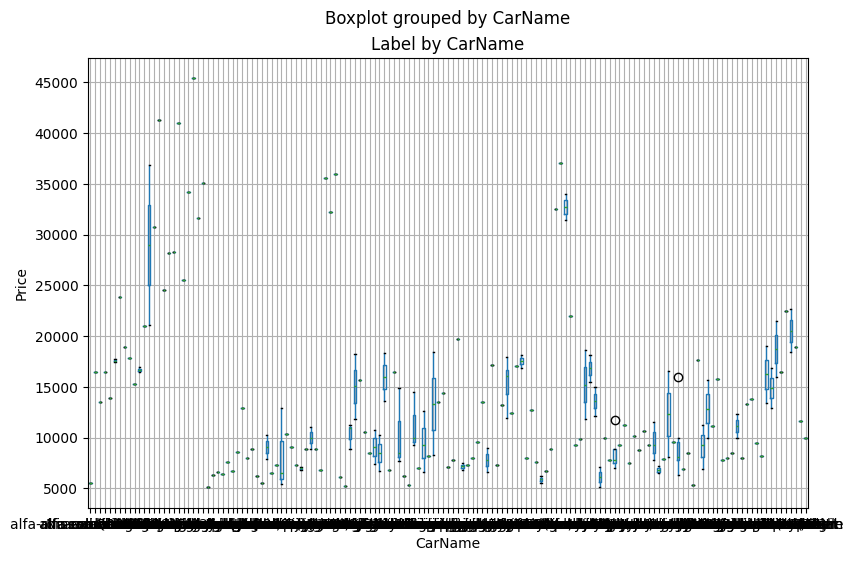

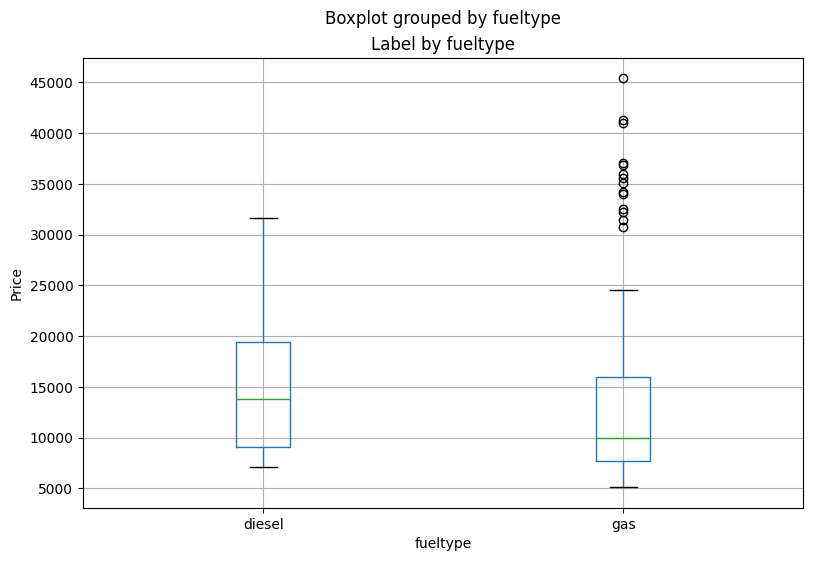

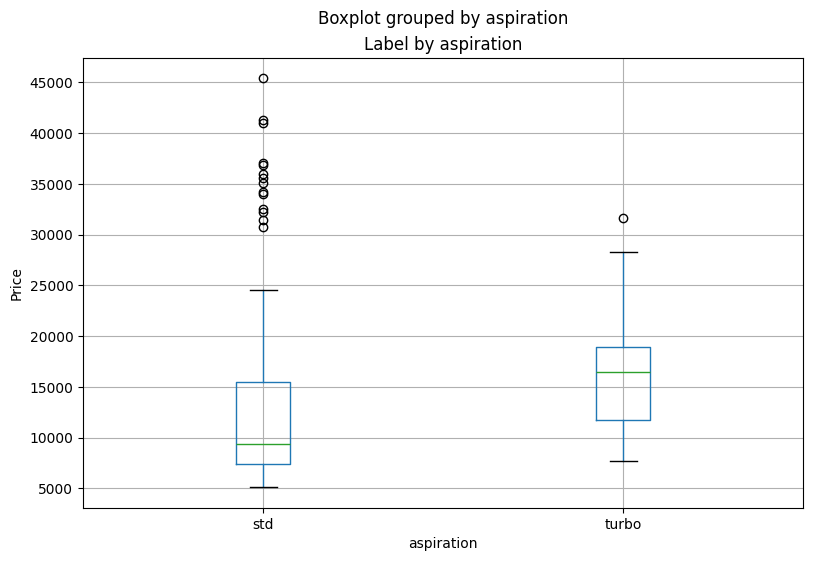

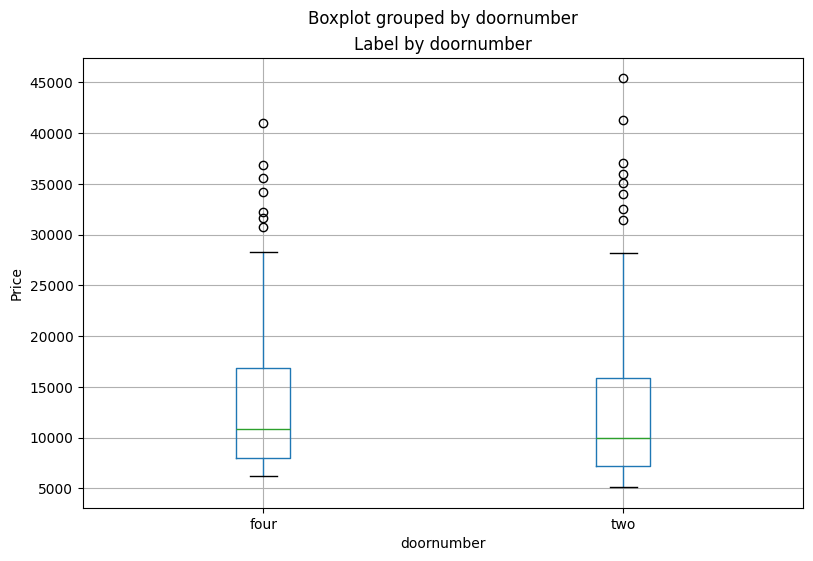

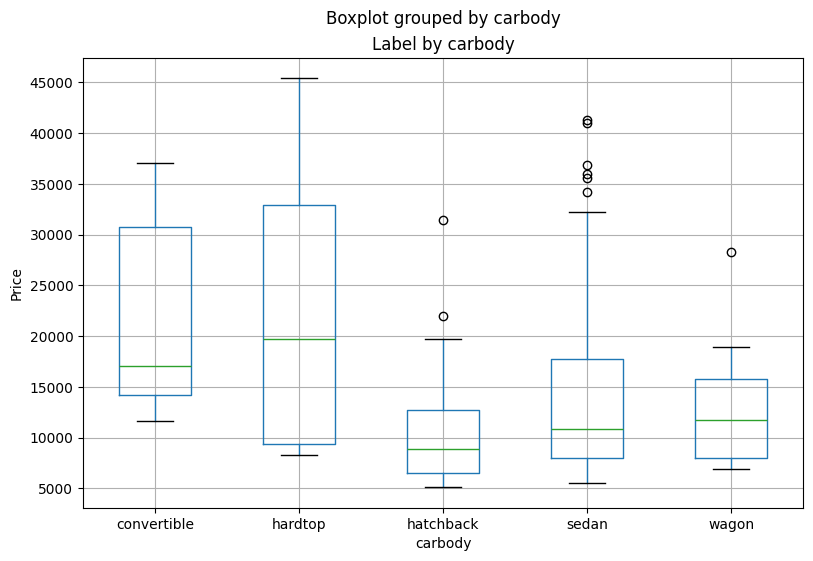

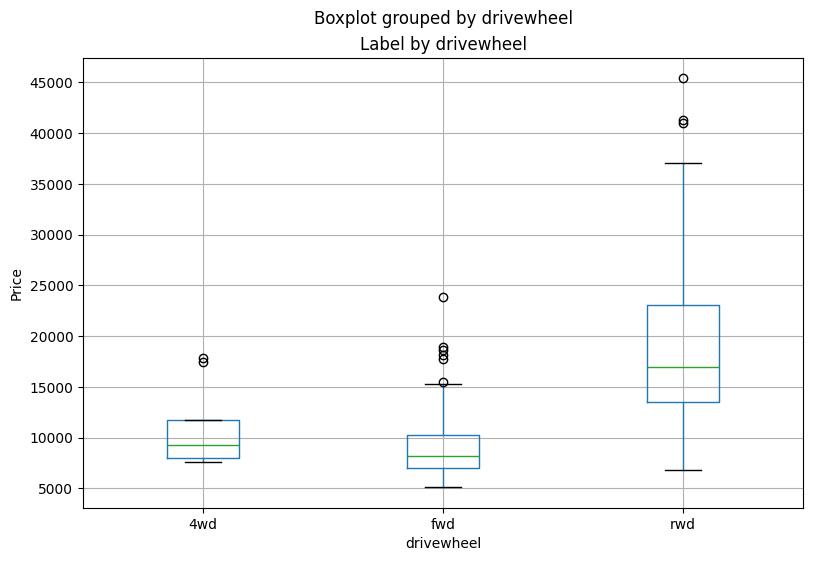

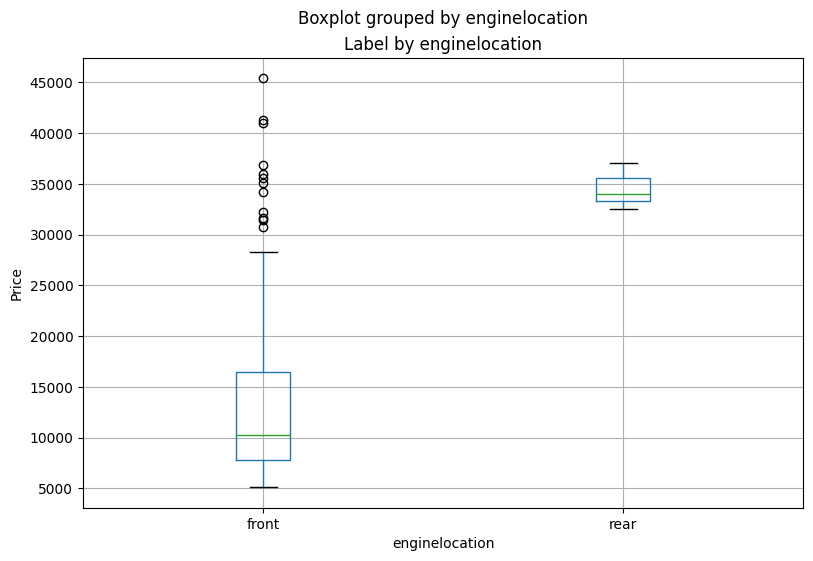

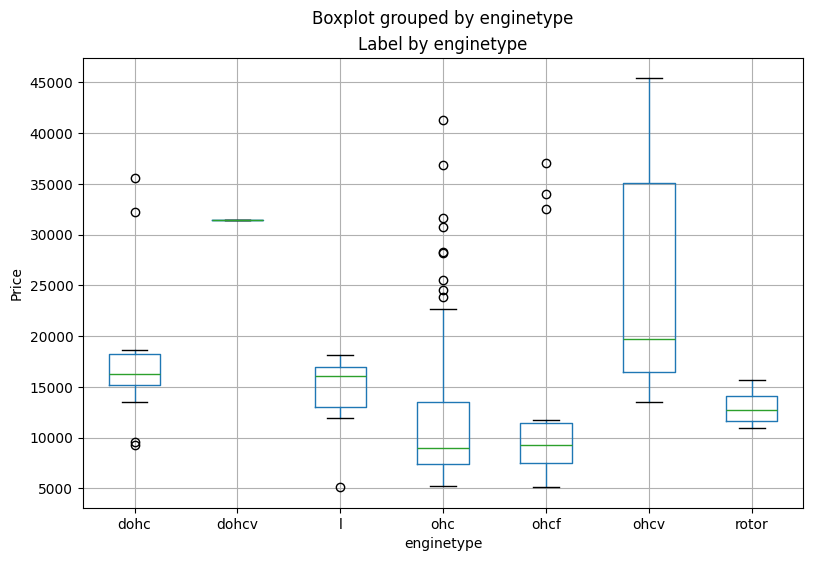

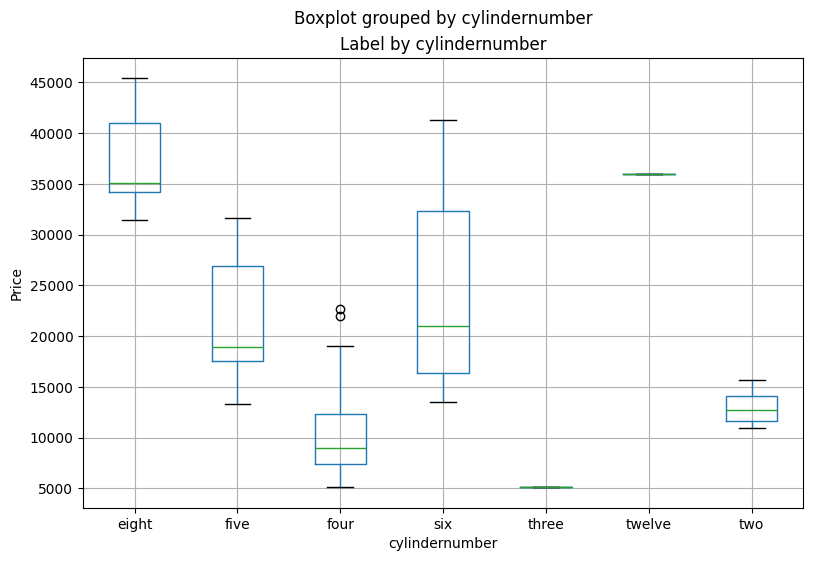

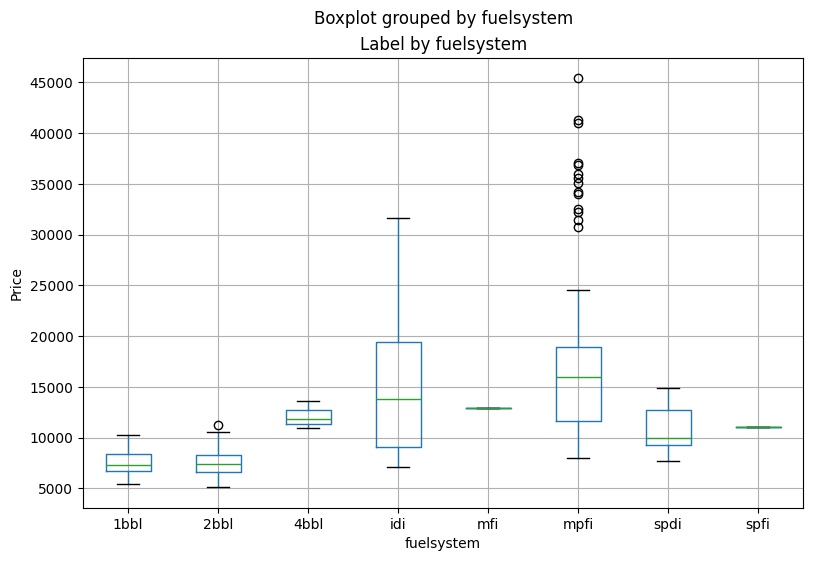

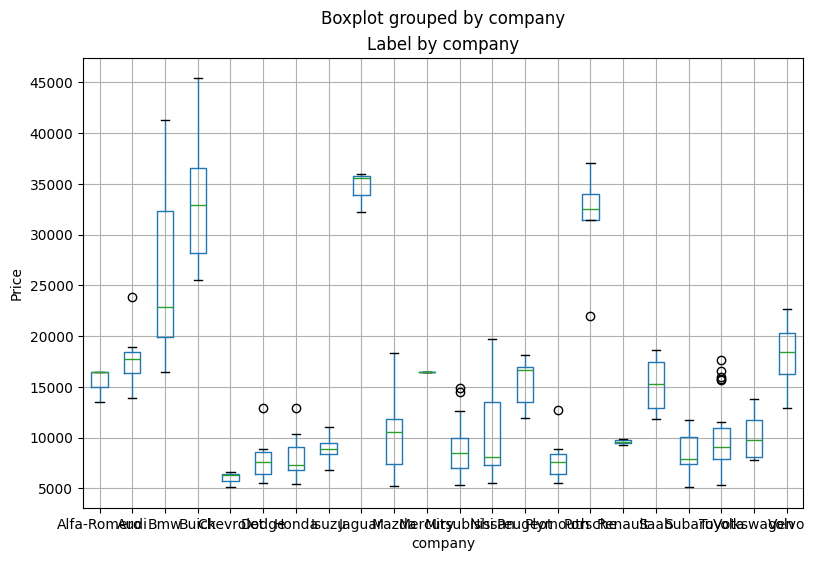

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
    plt.show()

<Figure size 2000x600 with 0 Axes>

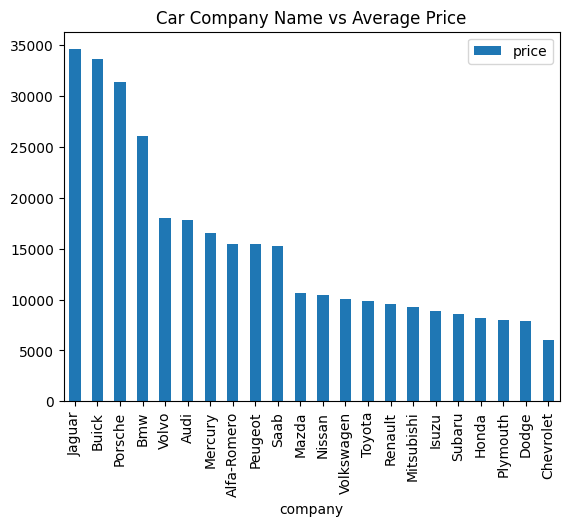

In [ ]:
plt.figure(figsize=(20, 6))
df_autox = pd.DataFrame(dataset.groupby(['company'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
df_autox.rename(columns={'price':'price_mean'},inplace=True)
dataset = dataset.merge(df_autox,on = 'company',how = 'left')
dataset['company_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,price_mean,company_cat
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,13495.0,23.4,10820.08,Alfa-Romero,15498.333333,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,16500.0,23.4,10820.08,Alfa-Romero,15498.333333,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,154,5000,19,26,16500.0,21.8,11213.60,Alfa-Romero,15498.333333,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950.0,26.4,11690.92,Audi,17859.166714,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450.0,19.6,11726.24,Audi,17859.166714,1


In [ ]:
dataset.shape

(205, 31)

In [ ]:
dataset_pr = dataset.copy()
dataset_pr.shape

(205, 31)

In [ ]:
dataset.fuelsystem.value_counts()

,count
fuelsystem,
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


In [ ]:
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
"aspiration":{"turbo":1,"std":0},
"doornumber":
{"four": 4, "two": 2},
"drivewheel":{"fwd":0,"4wd":0,"rwd":1},
"cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
"two": 2, "twelve": 12, "three":3 }
}
dataset_pr = dataset_pr.replace(encoders_nums)

# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["carbody", "enginetype","fuelsystem"], prefix=["body", "etype","fsystem"])

dataset_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,front,88.6,168.8,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,0,0,2,1,front,88.6,168.8,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,front,94.5,171.2,...,True,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,0,0,4,0,front,99.8,176.6,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,0,0,4,0,front,99.4,176.6,...,False,False,False,False,False,False,False,True,False,False


In [ ]:

dataset_pr.shape

(205, 48)

In [ ]:
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl'
, 'fsystem_idi', 'fsystem_mpfi',
'fsystem_spdi'])
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features].apply(zscore)

y = np.log10(dataset_pr['price'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(164, 24)
(41, 24)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9324420504983304

In [ ]:
reg.coef_

array([ 0.07683825,  0.01590146, -0.05608906,  0.00149697,  0.02135358,
        0.01543893,  0.01238109,  0.00031735,  0.06565892,  0.01437322,
        0.0005336 , -0.00028112,  0.00042538, -0.00796079, -0.04125975,
       -0.05110849, -0.0658886 , -0.03672994, -0.04472375, -0.00052948,
       -0.01768536,  0.00149697,  0.01790728, -0.00753211])

In [ ]:
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 8981848.585185597
RMSE : 2996.9732373155416


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8839799650687881
Adjusted R2 :  0.7099499126719702


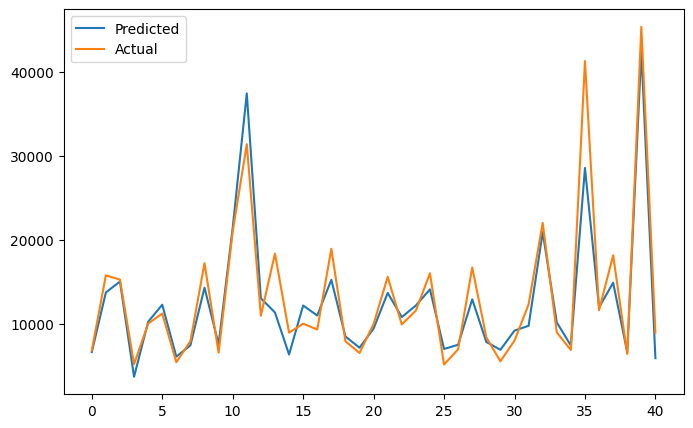

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.5843799787551645

In [ ]:
y_pred_l = lasso.predict(X_test)
MSE = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 41045022.19389814
RMSE : 6406.638915523345
R2 : 0.46981460848239964
Adjusted R2 :  -0.32546347879400095


In [ ]:
!pip install scikit-learn
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV # import GridSearchCV from sklearn.model_selection
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

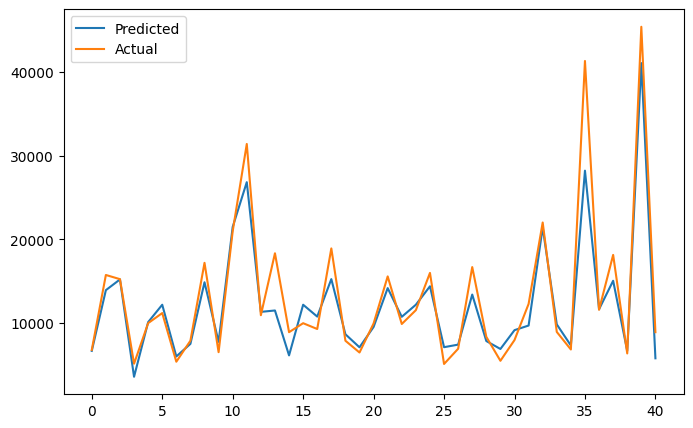

In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)

MSE : 8630691.066403879


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)

ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.9324370952031874

In [ ]:
y_pred_r = ridge.predict(X_test)
MSE = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8854606.545200933
RMSE : 2975.6690920196306
R2 : 0.8856235717031827
Adjusted R2 :  0.7140589292579569


In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.005204770442303097
